### 역전파(back-propagation)
- 신경망을 학습시킬 때 이용하는 알고리즘
- 출력값과 정답의 오차를 네트워크에서 역전파시켜 네트워크의 가중치와 bias를 최적화시킴
- 순전파(forward propagation)로 얻은 출력값과 정답과의 오차를 하나씩 층을 거슬러 올라가면서 역방향으로 전파
- 이 때 전파시킨 오차에 근거해 각 층의 가중치와 bias의 수정량을 계산
- 모든 층의 가중치와 bias를 조금씩 수정
- 위 과정을 반복하면 네트워크가 최적화(학습)

### 역전파 이해를 위한 개념
- 훈련 데이터, 테스트 데이터
- 손실 함수
- 경사 하강법
- 최적화 알고리즘
- 배치


### 훈련 데이터, 테스트 데이터
- 훈련 데이터 : 신경망이 학습에 이용되는 데이터
- 테스트 데이터 : 학습 결과의 검증에 사용되는 데이터
- 각 데이터는 여러 개의 입력값(feature)과 정답으로 구성
<img src="data/train_test.png" align="left">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

- 입력값과 정답 한 쌍을 샘플이라 칭함
- 일반적으로 훈련 데이터의 샘플 수가 테스트 데이터의 샘플수보다 월등히 많음
- 훈련 데이터로 학습이 제대로 된 신경망은 테스트 데이터에서 좋은 결과가 나옴

- 회귀문제의 경우 정답은 다음과 같이 여러개의 벡터로 나타냄<br>
 [0.23, -1.23, 5.44]
 <br>
<img src="data/regression.png" align="left">




- 분류 문제의 경우 다음 처럼 원핫인코딩 형태로 표현<br>
[0,0,1]
<br>
<img src="data/classification.png" align="left">

### 손실 함수(loss function)
- 출력값과 정답(target)의 오차를 정의하는 함수

1. 평균제곱오차 - MSE(Mean Squared Error)<br>
- 주로 회귀문제에 사용
<br>
<img src="data/mse.png" align="left">



In [1]:
import numpy as np

def mean_squared_error(y,t):
    return np.sum(np.power(y-t),2) / y.shape[0]

### 오차제곱합 SSE(Sum of Squared for Error)
- 회귀문제에 사용
<br>
<img src="data/sse.png" align="left">

In [3]:
def square_sum(y,t):
    return (1.0/2.0) * (np.sum(np.square(y-t)))

### 교차 엔트로피(Cross Entropy)
- 분류 문제에 사용
<br>
<img src="data/cross_entropy_1.png" align="left">
<br>
<br>
<br>
<br>
- 아래의 식으로 변형
<br>
<img src="data/cross_entropy_2.png" align="left">

- 분류 문제에서 정답은 1이 하나이고 나머지는 모두 0인 one-hot 인코딩 벡터로 표현
- 따라서 우변의 시그마 내부에서 tk가 1인 항의 오차에만 영향을 줌

- y  =  -log(x)

In [5]:
import matplotlib.pyplot as plt

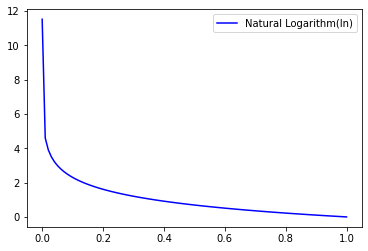

In [6]:
x = np.linspace(start=0.00001, stop=1.0, num=100)
plt.plot(x, -np.log(x), 'b-', label='Natural Logarithm(ln)')
plt.legend()
plt.show()

- x가 1일 때는 0이고, 0에 근접할수록 무한대로 커짐
- 즉, 정답에 가까울수록 전체 오차 값은 작아지며, 반대로 정답에서 멀어질수록 한없이 커짐
- 교차 엔트로피의 장점 중 하나는 출력값과 차이가 클수록 학습 속도가 빨라짐

In [7]:
def cross_entropy(y,t):
    return -np.sum(t*np.log(y+1e-7))

- log함수의 진수 부분이 0이 되면 무한 발산하여, 계산을 수행할 수 없기에 이를 방지하기 위해 1e-7을 더했음

### 경사하강법
<br>
<img src="data/gredient_descent.png" align="left">
<br>
<img src="data/backpropagation.png" align="left">

